In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
score_data = pd.read_csv("score_data.csv")

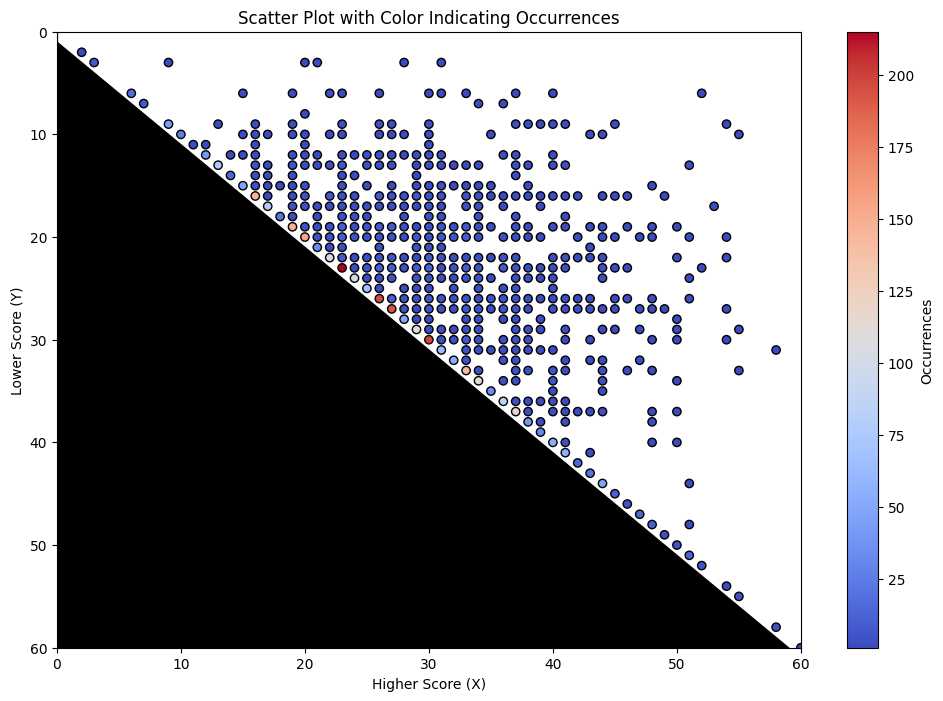

In [3]:
# Ensure higher score is always on the x-axis
score_data['X'] = score_data[['Score1', 'Score2']].max(axis=1)
score_data['Y'] = score_data[['Score1', 'Score2']].min(axis=1)

# Count occurrences
score_counts = score_data.groupby(['X', 'Y']).size().reset_index(name='Count')

# Create plot with fixed axis limits [0,60] by [0,60]
plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    score_counts['X'], 
    score_counts['Y'], 
    c=score_counts['Count'],  # Color based on occurrences
    cmap='coolwarm',  # Colormap
    edgecolors='black'
)

# Add colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Occurrences")

# Labels and title
plt.title("Scatter Plot with Color Indicating Occurrences")
plt.xlabel("Higher Score (X)")
plt.ylabel("Lower Score (Y)")

# Set axis limits
plt.xlim(0, 60)
plt.ylim(0, 60)

# Invert Y-axis
plt.gca().invert_yaxis()

# Fill lower left triangle where Y > X with black
x = np.linspace(0, 60, 60)

plt.gca().fill_betweenx(x, 0, x-1, color='black', alpha=1)

# Show plot
plt.show()

In [4]:
scms = score_counts.sort_values(by='Count', ascending=False)

print(scms)

        X     Y  Count
87   23.0  23.0    215
190  30.0  30.0    199
123  26.0  26.0    196
137  27.0  27.0    193
55   20.0  20.0    155
..    ...   ...    ...
265  35.0  22.0      1
266  35.0  24.0      1
268  35.0  27.0      1
269  35.0  31.0      1
477  62.0  36.0      1

[478 rows x 3 columns]
